In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

### В качестве тренировочных данных будем использовать Boston-датасет, который можно загрузить из библиотеки sklearn

In [2]:
from sklearn.datasets import load_boston

In [3]:
#X, y = load_boston(return_X_y=True)
boston = load_boston()
print("Type of boston = ", type(boston))

Type of boston =  <class 'sklearn.utils.Bunch'>


In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
print( "target = ",
", ".join(str(k) for k in boston.target[0:5]),
"...",
", ".join(str(k) for k in boston.target[-5:]))

target =  24.0, 21.6, 34.7, 33.4, 36.2 ... 22.4, 20.6, 23.9, 22.0, 11.9


In [10]:
bostonDF = pd.DataFrame(boston.data)
bostonDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
bostonDF.columns = boston.feature_names
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [42]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Посмотрим на распределение целевой переменной

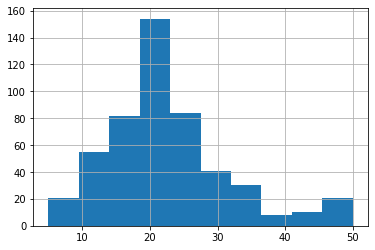

In [14]:
bostonDF.PRICE.hist()

#### ... и после логорифмирования

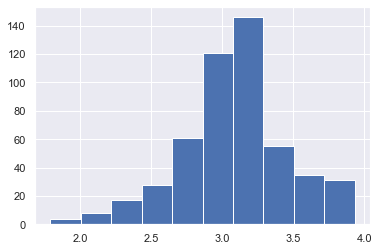

In [27]:
price_log = bostonDF.PRICE.apply(lambda w: np.log(w + 1))
price_log.hist()

### Посмотрим на матрицу корреляций

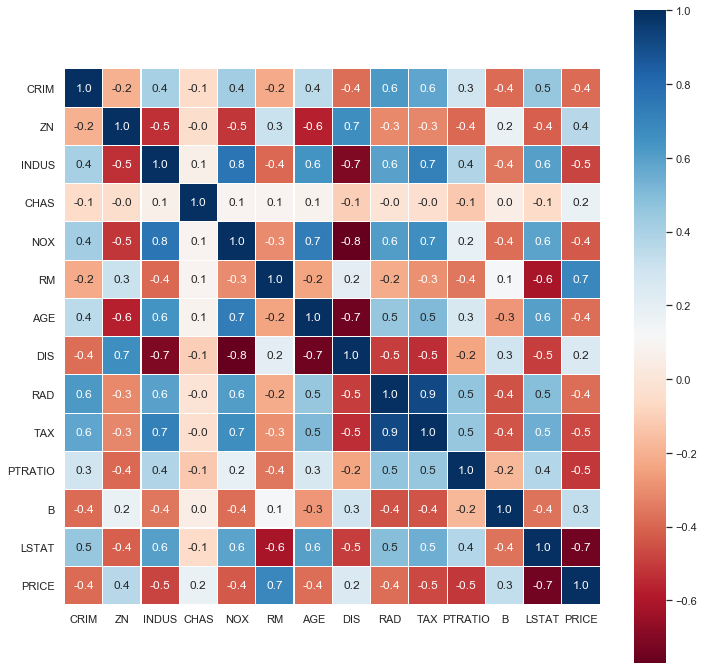

In [25]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(bostonDF.corr(), square=True, annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [15]:
X = bostonDF.drop('PRICE', axis = 1)
y = bostonDF['PRICE']

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Посмотрим на коэффициенты

In [20]:
print("Estimated intercept coeff: ", lm.intercept_)
print("Number of coeffs: ", len( lm.coef_))
print("Coeffs = ", lm.coef_)

Estimated intercept coeff:  36.45948838509015
Number of coeffs:  13
Coeffs =  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


#### Создадим DataFrame с коэффициентами

In [21]:
pd.DataFrame(zip(X.columns, lm.coef_), columns=['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Посмотрим на зависимость цены от количества жилых комнат

Text(0.5, 1.0, 'Price vs. # Rooms')

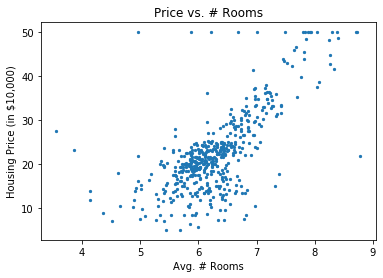

In [22]:
plt.scatter( bostonDF.RM, bostonDF.PRICE, s=5 )
plt.xlabel( "Avg. # Rooms" )
plt.ylabel( "Housing Price (in $10,000)" )
plt.title( "Price vs. # Rooms")

### Предсказываем цены

In [23]:
# Сначала первые 10
lm.predict(X)[0:10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

#### Посмотрим на зависимость реальных и предсказанных цен

Text(0.5, 1.0, 'Real vs Predicted Housing Prices')

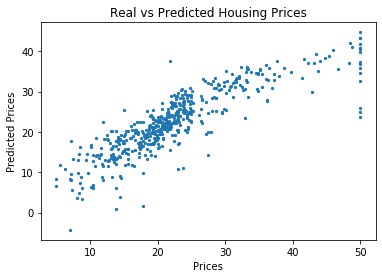

In [24]:
plt.scatter(bostonDF.PRICE, lm.predict(X), s=5)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Real vs Predicted Housing Prices")

### Вычислим среднюю абсолютную и среднеквадратичную ошибки

In [31]:
MSE = np.mean((y-lm.predict(X))**2)
MAE = np.mean(abs(y-lm.predict(X)))
print( "Mean squared error = ", MSE)
print( "Mean absolute error = ", MAE)

Mean squared error =  21.89483118172922
Mean absolute error =  3.2708628109003213


#### и при помощи встроенных методов

In [32]:
MSE = metrics.mean_squared_error(y, lm.predict(X))
MAE = metrics.mean_absolute_error(y, lm.predict(X))
print("Mean squared error = ", MSE)
print("Mean absolute error = ", MAE)

Mean squared error =  21.894831181729202
Mean absolute error =  3.270862810900317


### Training and Validating

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


### Теперь построим линейную регрессию используя только тренировочные данные

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Оценим работу модели на тренировочных и тестовых данных

In [40]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
print("MSE_train = ", np.mean((y_train-lm.predict(X_train))**2))
print("MSE_test = ", np.mean((y_test-lm.predict(X_test))**2))
print("MAE_train = ", np.mean(abs(y_train-lm.predict(X_train))))
print("MAE_test = ", np.mean(abs(y_test-lm.predict(X_test))))

MSE_train =  22.855685567606745
MSE_test =  18.929248330112948
MAE_train =  3.358691182773888
MAE_test =  3.3699009048812414


### Plotting the Residuals

Text(0, 0.5, 'Residuals')

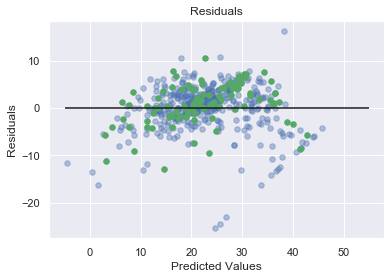

In [41]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c ='b', s=30, alpha=0.4 )
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c ='g', s=30 )
plt.hlines(y=0, xmin=-5, xmax=55)
plt.title("Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")